In [1]:
from IPython.display import Image

## NOTES

- In some applications, labeling every pixel to a label isimportant rather than bounding box which may have multiple objects. Semantic segmentation is the task of predicting pixel-wise labels.

- Rather than assigning a label to the whole image, labels are assigned to each pixel. Semantic segmentation labels pixels independently.

- One important thing to note is that we're not separating instances of the same class; we only care about the category of each pixel. In other words, if you have two objects of the same category in your input image, the segmentation map does not inherently distinguish these as separate objects. There exists a different class of models, known as instance segmentation models, which do distinguish between separate objects of the same class.




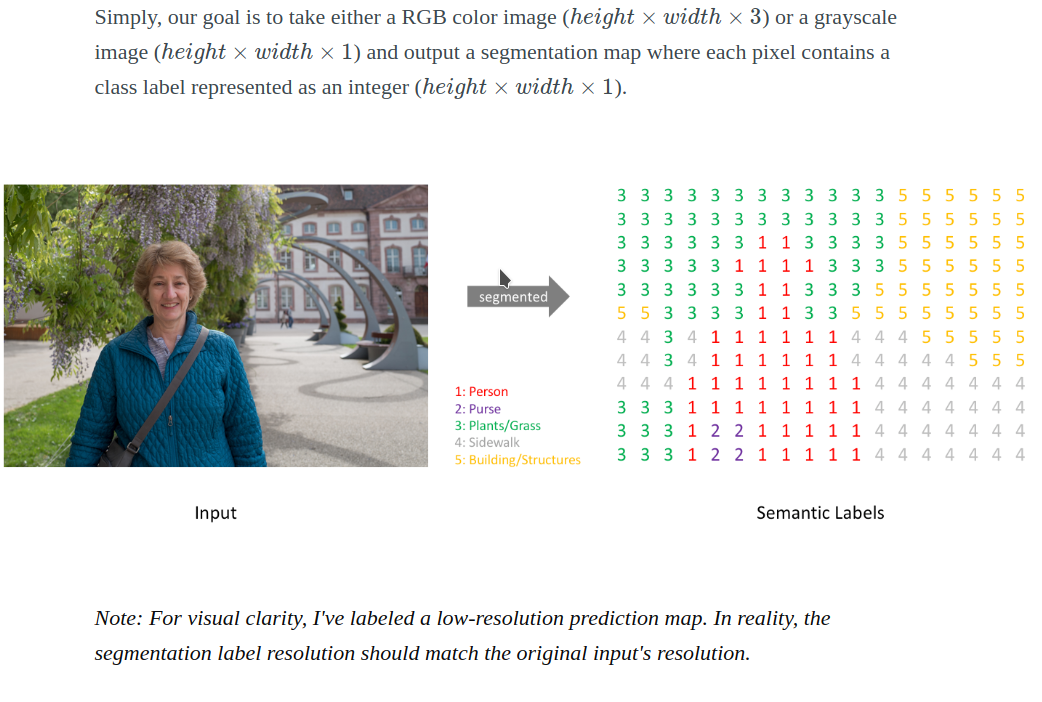

In [2]:
Image("1.png")

Segmentation models are useful for a variety of tasks, including:


- A medical image can be diagnosed with segmentation techniques. Modern medical imaging techniques such as Magnetic Resonance Imaging (MRI), Computed Tomography (CT), and Retinopathy create high-quality images. The images generated by such techniques can be segmented into various regions to detect tumours from brain scans or spots from retina scans. Some devices provide volumetric images which can also be analyzed by segmentation. 

- Satellite images have become abundant recently. The images captured by satellite provide a high-resolution view of the total surface of the earth. By analyzing the satellite imagery, we can understand several things about earth such as:
    - Measuring the rate of construction in a country related to economic growth
    - Measuring the oil tanks
    - Planning and organizing the traffic
    - Calculating the deforestation and its effects
    - Helping wildlife preservation by counting animals and tracking their movements
    - Discovering archaeological sites
    - Mapping the damaged regions due to a natural disaster

- **A naive approach** towards constructing a neural network architecture for this task is to simply stack a number of convolutional layers (with same padding to preserve dimensions) and output a final segmentation map. This directly learns a mapping from the input image to its corresponding segmentation through the successive transformation of feature mappings; however,**it's quite computationally expensive to preserve the full resolution throughout the network.**

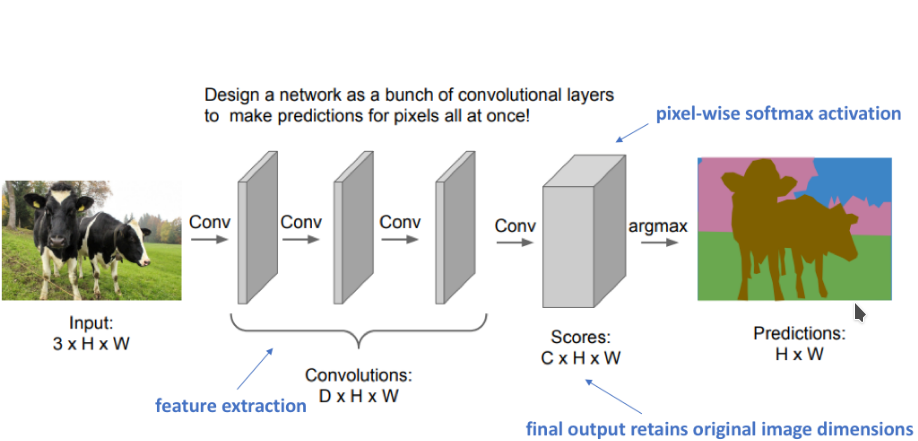

In [3]:
Image("2.png")

- In order to maintain expressiveness, we typically need to increase the number of feature maps (channels) as we get deeper in the network.

- **One popular** approach for image segmentation models is to follow an encoder/decoder structure where we downsample the spatial resolution of the input, developing lower-resolution feature mappings which are learned to be highly efficient at discriminating between classes, and the upsample the feature representations into a full-resolution segmentation map.

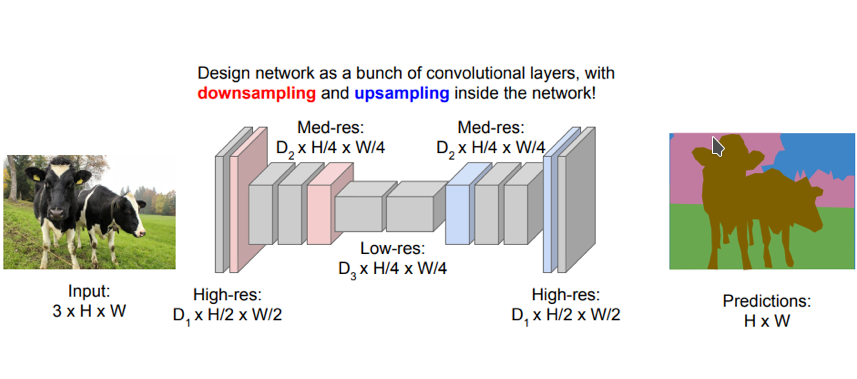

In [2]:
Image("3.png")

- transpose convolutions are by far the most popular approach as they allow for us to develop a learned upsampling.
- transpose convolution, we take a single value from the low-resolution feature map and multiply all of the weights in our filter by this value, projecting those weighted values into the output feature map.

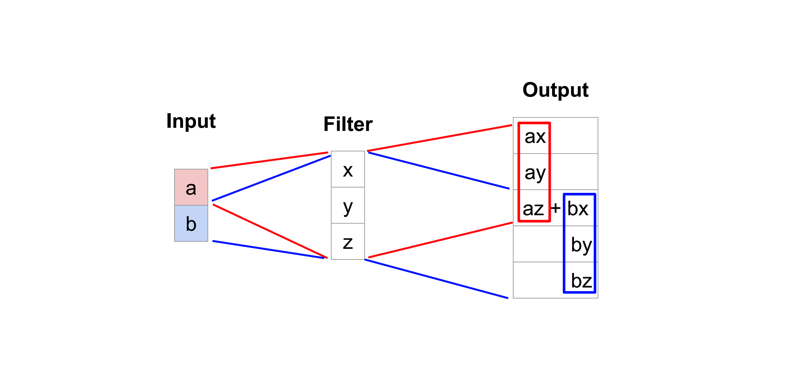

In [3]:
Image("4.png")

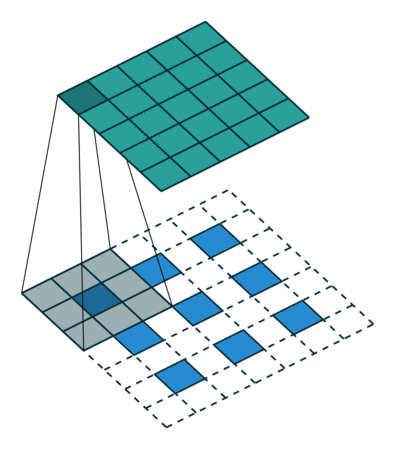

In [4]:
Image("5.gif")

**FCN**
- Fully Convolutional Networks for Semantic Segmentation
- Key Contributions:

    - Popularize the use of end to end convolutional networks for semantic segmentation
    - Re-purpose imagenet pretrained networks for segmentation
    - Upsample using deconvolutional layers
    - Introduce skip connections to improve over the coarseness of upsampling


- Key observation is that fully connected layers in classification networks can be viewed as convolutions with kernels that cover their entire input regions. This is equivalent to evaluating the original classification network on overlapping input patches but is much more efficient because computation is shared over the overlapping regions of patches. Although this observation is not unique to this paper (see overfeat, this post), it improved the state of the art on VOC2012 significantly.
- Well-studied image classification networks (eg. AlexNet) to serve as the encoder module of the network, appending a decoder module with transpose convolutional layers to upsample the coarse feature maps into a full-resolution segmentation map.
- So the final output layer will be the same height and width as the input image, but the number of channels will be equal to the number of classes. If we’re classifying each pixel as one of fifteen different classes, then the final output layer will be height x width x 15 classes.

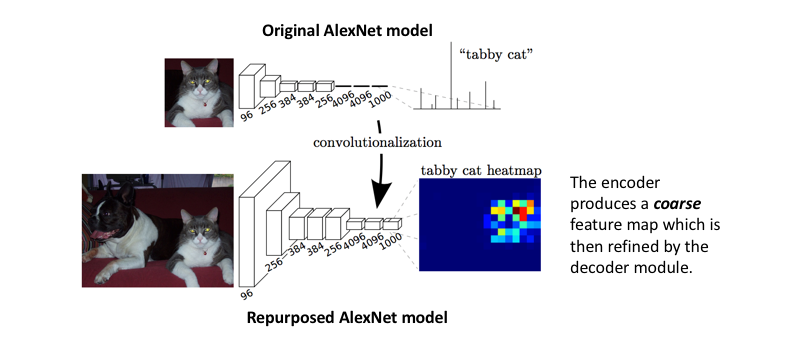

In [6]:
Image("6.png")

- The full network, as shown below, is trained according to a pixel-wise cross entropy loss.
- Using a softmax probability function, we can find the most likely class for each pixel
- However, because the encoder module reduces the resolution of the input by a factor of 32, the decoder module struggles to produce fine-grained segmentations (as shown below).

- FCNs use “deconvolutions”, or essentially backwards convolutions, to upsample the intermediate tensors so that they match the width and height of the original input image.

- Backward convolution layers are just convolutions, turned around, their weights are learnable, just like normal convolutional layers.

- Semantic segmentation faces an inherent tension between semantics and location: global information resolves what while local information resolves where... Combining fine layers and coarse layers lets the model make local predictions that respect global structure. ― Long et al.

- The authors address this tension by slowly upsampling (in stages) the encoded representation, adding "skip connections" from earlier layers, and summing these two feature maps.



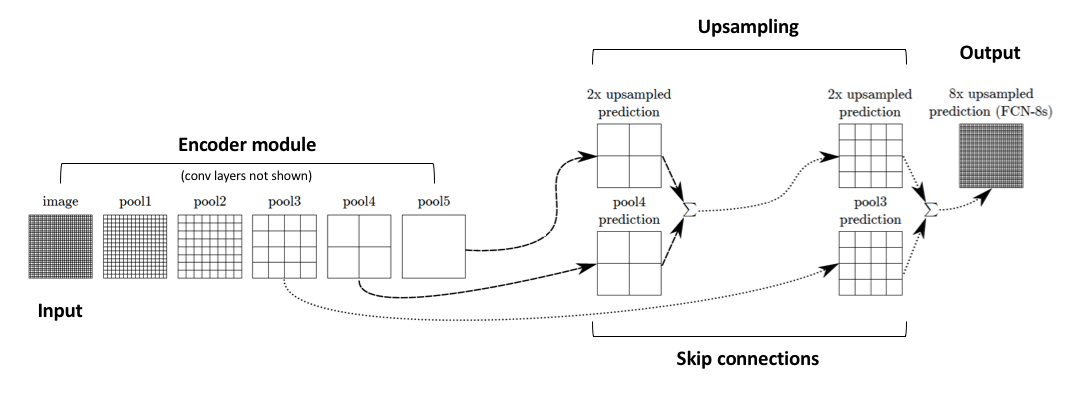

In [2]:
Image("7.png")

- These skip connections from earlier layers in the network (prior to a downsampling operation) should provide the necessary detail in order to reconstruct accurate shapes for segmentation boundaries. Indeed, we can recover more fine-grain detail with the addition of these skip connections.

**Dilated/atrous convolutions**

- One benefit of downsampling a feature map is that it broadens the receptive field (with respect to the input) for the following filter, given a constant filter size. Recall that this approach is more desirable than increasing the filter size due to the parameter inefficiency of large filters.

- Convolutions with larger spatial filters (e.g. 5 × 5 or 7 × 7) tend to be disproportionally expensive in terms of computation. For example, a 5 × 5 convolution with n filters over a grid with m filters is 25/9 = 2.78 times more computationally expensive than a 3 × 3 convolution with the same number of filters.
- This broader context comes at the cost of reduced spatial resolution.
- **Dilated convolutions** provide alternative approach towards gaining a wide field of view while preserving the full spatial dimension. 


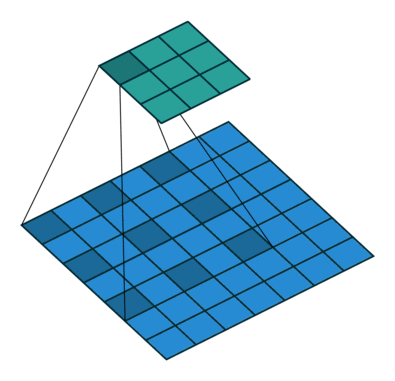

In [3]:
Image("8.gif")

- Some architectures swap out the last few pooling layers for dilated convolutions with successively higher dilation rates to maintain the same field of view while preventing loss of spatial detail. However, it is often still too computationally expensive to completely replace pooling layers with dilated convolutions.




**Defining a loss function**

- The most commonly used loss function for the task of image segmentation is a pixel-wise cross entropy loss. This loss examines each pixel individually, comparing the class predictions (depth-wise pixel vector) to our one-hot encoded target vector

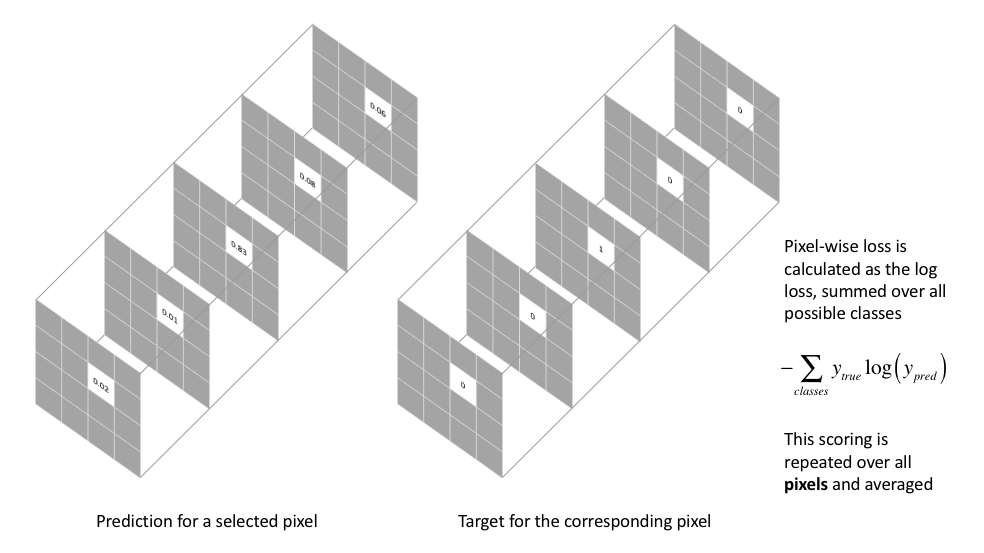

In [4]:
Image("9.png")

- Because the cross entropy loss evaluates the class predictions for each pixel vector individually and then averages over all pixels, we're essentially asserting equal learning to each pixel in the image. This can be a problem if your various classes have unbalanced representation in the image, as training can be dominated by the most prevalent class. Long et al. (FCN paper) discuss weighting this loss for each output channel in order to counteract a class imbalance present in the dataset.

**SegNet**
- SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation
- Submitted on 2 Nov 2015
- Key Contributions: 
    - Maxpooling indices transferred to decoder to improve the segmentation resolution.

- FCN, despite upconvolutional layers and a few shortcut connections produces coarse segmentation maps. Therefore, more shortcut connections are introduced. However, instead of copying the encoder features as in FCN, indices from maxpooling are copied. This makes SegNet more memory efficient than FCN.

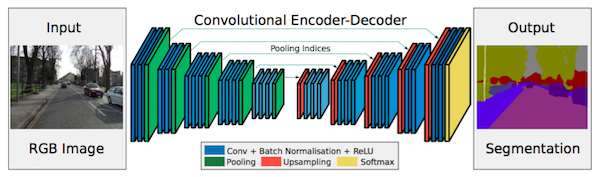

In [2]:
Image("10.png")

- https://www.jeremyjordan.me/semantic-segmentation/
- http://blog.qure.ai/notes/semantic-segmentation-deep-learning-review
- https://arxiv.org/pdf/1512.00567.pdf 